#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

#### Read all the file names

In [49]:
dog = glob.glob('archive/animals/animals/dog/*.jpg')
cat = glob.glob('archive/animals/animals/cat/*.jpg')
dolphin = glob.glob('archive/animals/animals/dolphin/*.jpg')
panda = glob.glob('archive/animals/animals/panda/*.jpg')
pigeon = glob.glob('archive/animals/animals/pigeon/*.jpg')


#### Read image data from all files and store it in a variable, Store the label as well

In [51]:
image = []
label = []

for i in dog:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in cat:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in dolphin:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in panda:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

for i in pigeon:
    img = plt.imread(i)
    image.append(img)
    label.append(4)

#### Plot some of the images

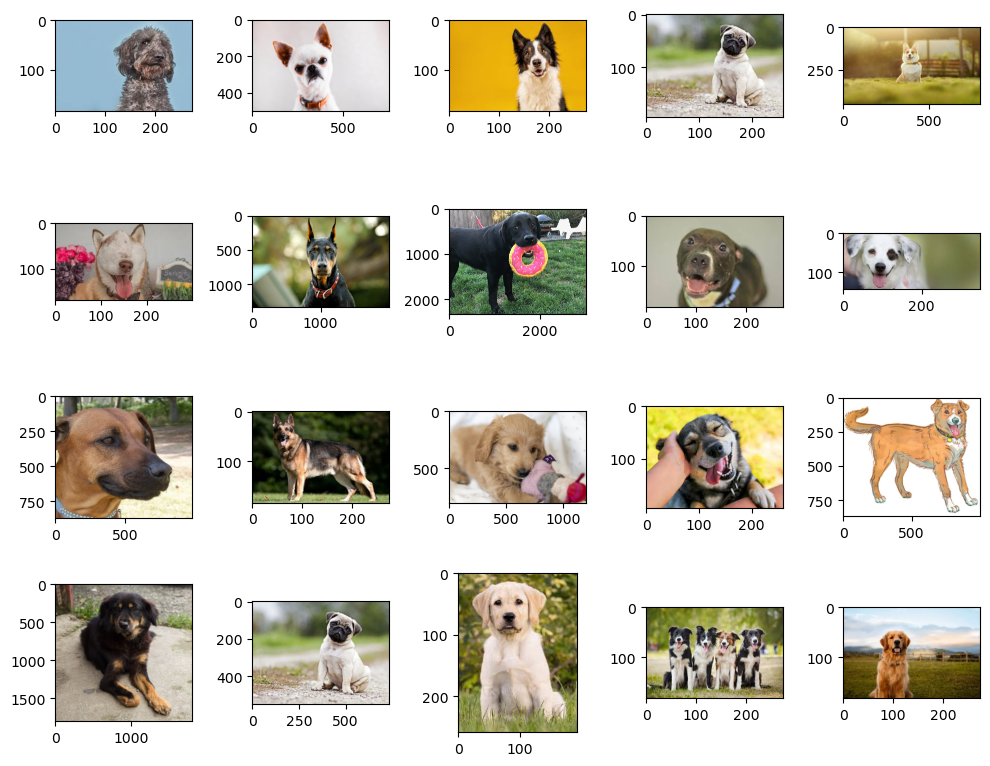

In [56]:
plt.figure(figsize = (10,8))
for i in range(min(len(image),20)):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
plt.tight_layout()

#### Shuffle images and labels

In [58]:
image, label = shuffle(image,label)

#### Plot the images once again

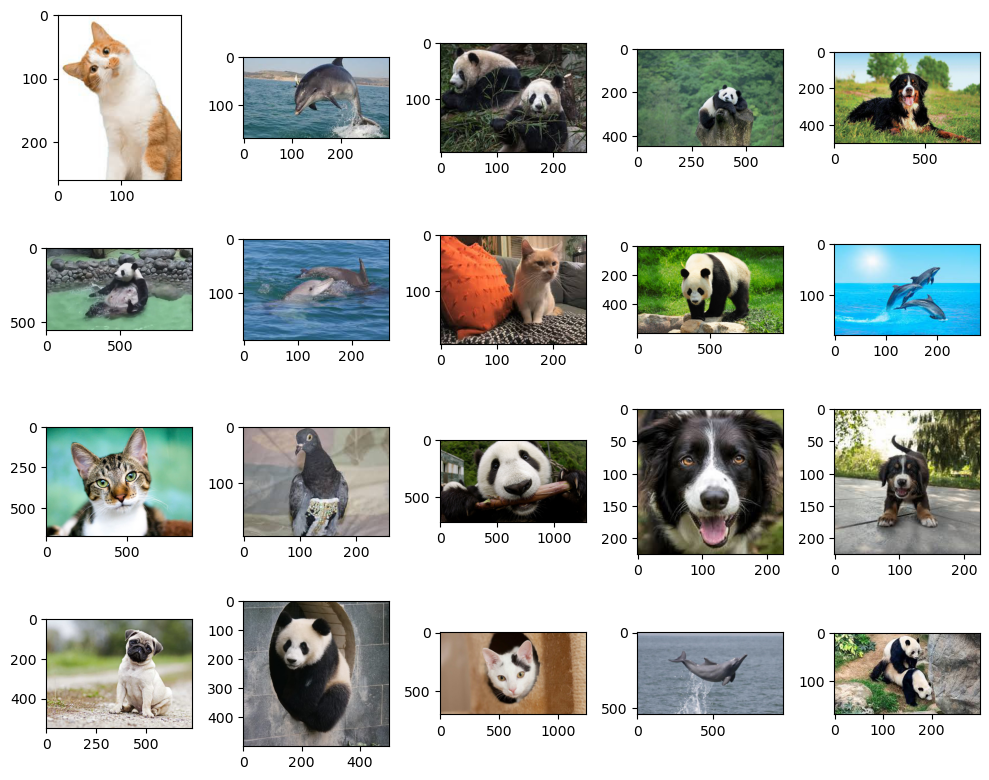

In [60]:
plt.figure(figsize = (10,8))
for i in range(min(len(image),20)):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
plt.tight_layout()

#### Check the shape of some of the images

In [62]:
for i in range(4):
    print(image[i].shape)

(260, 194, 3)
(168, 300, 3)
(194, 259, 3)
(446, 670, 3)


#### Resize all the images to a same height and width

In [64]:
X = []
for i in image:
    X.append(resize(i, (500,500,3)))

#### Convert images and labels to numpy array and store them as X and y variables

In [66]:
X = np.array(X)
y = np.array(label)

#### Reshape the images to 1 dimension

In [68]:
d1, d2, d3, d4 = X.shape


In [70]:
X = X.reshape((d1, d2*d3*d4))

#### Train test Split

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#### Create KNN Model and train it

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [80]:
%time knn.fit(X_train,y_train)

CPU times: total: 844 ms
Wall time: 1.16 s


KNeighborsClassifier(n_neighbors=1)

#### Make predictions with X_test

In [82]:
%time y_pred = knn.predict(X_test)

CPU times: total: 1.73 s
Wall time: 1.42 s


#### Evaluate the model

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
accuracy_score(y_test,y_pred)

0.5666666666666667

<Axes: >

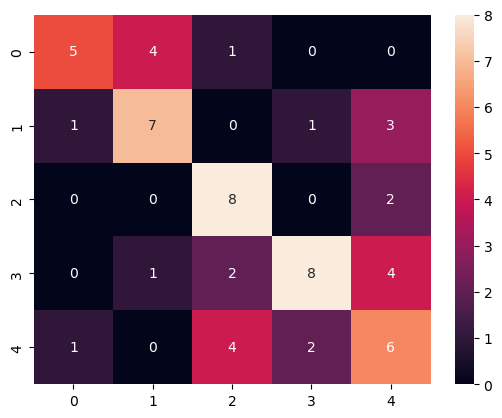

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.58      0.58      0.58        12
           2       0.53      0.80      0.64        10
           3       0.73      0.53      0.62        15
           4       0.40      0.46      0.43        13

    accuracy                           0.57        60
   macro avg       0.59      0.58      0.57        60
weighted avg       0.59      0.57      0.57        60

